In [1]:
from __future__ import print_function, division
import os
import torch
import pandas as pd
from skimage import io, transform
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, utils
import torchvision.models as models
import shutil 
import warnings
import torch.nn.functional as F
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
import time
import argparse
import torchvision
from torch.autograd import Variable
from tqdm import tqdm
import array
import matplotlib.pyplot as plt
from PIL import Image
# Ignore warnings
warnings.filterwarnings("ignore")
plt.ion()   # interactive mode

path_to_ddsm = "/home/harsh/project/DDSM/"

In [2]:
model_conv = torch.load('/home/harsh/project/code/model.pt')
print("My model - ", model_conv)

My model -  ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace)
     

In [3]:
data_dir = path_to_ddsm
input_shape = 224
batch_size = 1
mean = [0.5, 0.5, 0.5]
std = [0.5, 0.5, 0.5]
scale = (224,224)
use_parallel = True
use_gpu = False
epochs = 100
data_transforms = {
        'train': transforms.Compose([
        transforms.Resize(scale),
        transforms.RandomResizedCrop(input_shape),
        #transforms.RandomHorizontalFlip(),
        transforms.RandomVerticalFlip(),
        #transforms.RandomRotation(degrees=90),
        transforms.ToTensor(),
        transforms.Normalize(mean, std)]),
        'val': transforms.Compose([
        transforms.Resize(scale),
        transforms.CenterCrop(input_shape),
        transforms.ToTensor(),
        transforms.Normalize(mean, std)]),}
print(data_transforms)

{'val': Compose(
    Resize(size=(224, 224), interpolation=PIL.Image.BILINEAR)
    CenterCrop(size=(224, 224))
    ToTensor()
    Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
), 'train': Compose(
    Resize(size=(224, 224), interpolation=PIL.Image.BILINEAR)
    RandomResizedCrop(size=(224, 224), scale=(0.08, 1.0), ratio=(0.75, 1.3333), interpolation=PIL.Image.BILINEAR)
    RandomVerticalFlip(p=0.5)
    ToTensor()
    Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
)}


{'val': Dataset ImageFolder
    Number of datapoints: 75
    Root Location: /home/harsh/project/DDSM/val
    Transforms (if any): Compose(
                             Resize(size=(224, 224), interpolation=PIL.Image.BILINEAR)
                             CenterCrop(size=(224, 224))
                             ToTensor()
                             Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
                         )
    Target Transforms (if any): None}
Hello
torch.Size([1, 3, 224, 224])


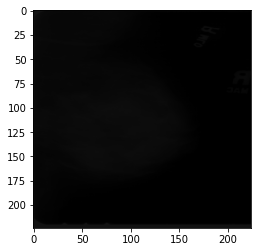

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor([ 1])
tensor([ 2], device='cuda:0')
Before
tensor([[[[ 0.9928, -0.5614,  0.1170,  ...,  0.7608, -0.6895, -0.5958],
          [ 0.0025,  0.3125, -0.0631,  ...,  0.3031,  0.6358, -0.0899],
          [-0.4512, -0.6421, -0.0303,  ..., -0.7863,  0.4992,  0.8505],
          ...,
          [ 0.1976,  0.9074,  0.2284,  ...,  0.1138,  0.8544,  0.2589],
          [-0.4789,  0.5352,  0.1393,  ..., -0.5977,  0.3076,  0.3006],
          [ 0.0686,  0.9439,  0.0480,  ...,  0.6265,  0.6956,  0.9503]],

         [[-0.0965,  0.6873, -0.8938,  ..., -0.3805, -0.7111, -0.1861],
          [-0.5536, -0.3460,  0.1658,  ..., -0.6316,  0.6472, -0.4155],
          [-0.5629, -0.6879,  0.3325,  ..., -0.2837,  0.8623,  0.3867],
          ...,
          [-0.9790,  0.4198,  0.7100,  ..., -0.6267,  0.4327, -0.9332],
          [ 0.2693, -0.1409, -0.2933,  ..., -0.7374,  0.1792,  0.8897],
          [-0.7114, -0.0765,  0.0742,  ..., -0.2985,  0.2827, -0.2441]],

         [[ 0.0711,  0.4608,  0.4330,  ..., -0.5257,

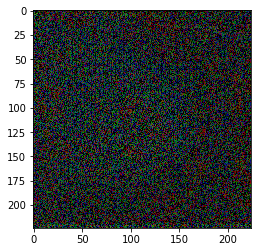

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor([ 0], device='cuda:0')
Before
tensor([[[[ 2.8891e-01,  2.6220e-02,  1.9705e-01,  ...,  1.8089e-01,
           -6.7239e-01, -6.0063e-01],
          [-6.2801e-01,  6.1624e-01,  6.0170e-01,  ...,  9.9278e-01,
            8.7426e-01, -4.9260e-01],
          [-7.4434e-01, -9.5069e-01,  5.7818e-01,  ...,  3.7449e-01,
           -5.2955e-01, -2.7836e-01],
          ...,
          [ 6.4971e-01,  9.6833e-01,  8.1884e-01,  ...,  8.4925e-01,
           -5.0413e-01, -7.0006e-02],
          [ 8.1343e-01, -7.5731e-01,  3.2479e-01,  ..., -5.3053e-01,
            3.6920e-01,  3.1597e-01],
          [ 2.4411e-01, -6.6513e-01,  1.7872e-01,  ..., -8.8810e-01,
           -8.9781e-01,  7.9301e-01]],

         [[-4.3716e-02, -9.2544e-01, -7.5576e-01,  ...,  9.6685e-01,
           -6.7621e-01, -7.5780e-01],
          [-6.1113e-01, -6.6240e-01,  3.3174e-01,  ...,  8.4751e-02,
            3.8342e-01, -4.7884e-02],
          [-9.6096e-02, -2.9230e-01, -1.8004e-01,  ..., -9.1696e-01,
           -1.7087e-0

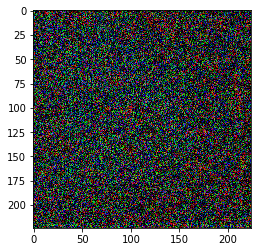

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor([ 1], device='cuda:0')
Before
tensor([[[[-4.3945e-20, -3.2645e-19, -9.5524e-20,  ...,  1.0142e-19,
            2.5930e-21,  2.0571e-19],
          [ 2.9493e-19, -1.6780e-19, -5.7468e-19,  ...,  1.7705e-19,
            5.1962e-20,  2.0525e-21],
          [-1.3020e-20,  3.6079e-19, -2.7516e-19,  ...,  4.4834e-20,
            1.4923e-19,  8.4353e-20],
          ...,
          [ 7.1527e-20, -1.4108e-19,  1.9466e-19,  ...,  1.5785e-19,
            6.6950e-20, -3.3593e-21],
          [-2.2285e-20,  4.1403e-20,  3.5038e-20,  ..., -2.8296e-20,
            1.2769e-20,  2.4156e-20],
          [-3.5093e-20,  9.9429e-20, -4.1182e-20,  ...,  1.0057e-19,
           -5.8726e-20, -1.1049e-19]],

         [[ 7.6464e-20, -2.1828e-19,  4.2997e-19,  ..., -3.7951e-20,
           -1.1189e-21,  1.5350e-20],
          [ 3.5459e-19,  1.0572e-19,  1.2175e-19,  ..., -1.4203e-19,
           -8.4761e-20, -2.5109e-19],
          [ 3.9351e-19,  1.9460e-19, -1.6738e-20,  ..., -2.0551e-19,
           -3.7785e-2

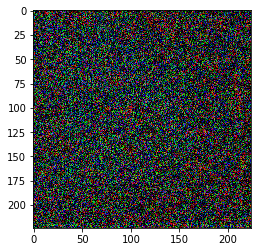

tensor([ 1], device='cuda:0')
Before


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor([[[[-4.3944e-20, -3.2645e-19, -9.5524e-20,  ...,  1.0142e-19,
            2.5931e-21,  2.0571e-19],
          [ 2.9493e-19, -1.6780e-19, -5.7468e-19,  ...,  1.7705e-19,
            5.1962e-20,  2.0523e-21],
          [-1.3020e-20,  3.6079e-19, -2.7516e-19,  ...,  4.4834e-20,
            1.4923e-19,  8.4354e-20],
          ...,
          [ 7.1527e-20, -1.4108e-19,  1.9466e-19,  ...,  1.5785e-19,
            6.6950e-20, -3.3593e-21],
          [-2.2285e-20,  4.1403e-20,  3.5038e-20,  ..., -2.8296e-20,
            1.2769e-20,  2.4156e-20],
          [-3.5093e-20,  9.9429e-20, -4.1182e-20,  ...,  1.0057e-19,
           -5.8726e-20, -1.1049e-19]],

         [[ 7.6464e-20, -2.1828e-19,  4.2997e-19,  ..., -3.7951e-20,
           -1.1188e-21,  1.5350e-20],
          [ 3.5459e-19,  1.0572e-19,  1.2175e-19,  ..., -1.4203e-19,
           -8.4761e-20, -2.5109e-19],
          [ 3.9351e-19,  1.9460e-19, -1.6738e-20,  ..., -2.0551e-19,
           -3.7785e-20,  5.2062e-20],
          ...,
     

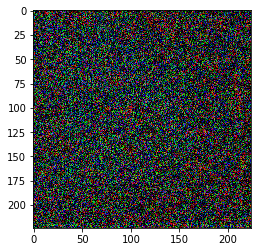

tensor([ 1], device='cuda:0')
Before


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor([[[[-4.3945e-20, -3.2645e-19, -9.5524e-20,  ...,  1.0142e-19,
            2.5930e-21,  2.0571e-19],
          [ 2.9493e-19, -1.6780e-19, -5.7468e-19,  ...,  1.7705e-19,
            5.1962e-20,  2.0523e-21],
          [-1.3020e-20,  3.6079e-19, -2.7516e-19,  ...,  4.4834e-20,
            1.4923e-19,  8.4354e-20],
          ...,
          [ 7.1527e-20, -1.4108e-19,  1.9466e-19,  ...,  1.5785e-19,
            6.6950e-20, -3.3592e-21],
          [-2.2285e-20,  4.1404e-20,  3.5038e-20,  ..., -2.8296e-20,
            1.2769e-20,  2.4156e-20],
          [-3.5093e-20,  9.9429e-20, -4.1182e-20,  ...,  1.0057e-19,
           -5.8726e-20, -1.1049e-19]],

         [[ 7.6464e-20, -2.1828e-19,  4.2997e-19,  ..., -3.7951e-20,
           -1.1188e-21,  1.5350e-20],
          [ 3.5459e-19,  1.0572e-19,  1.2175e-19,  ..., -1.4203e-19,
           -8.4761e-20, -2.5109e-19],
          [ 3.9351e-19,  1.9460e-19, -1.6738e-20,  ..., -2.0551e-19,
           -3.7785e-20,  5.2062e-20],
          ...,
     

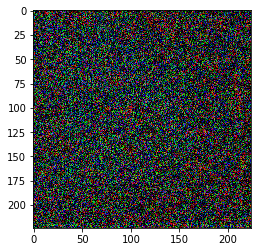

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor([ 1], device='cuda:0')
Before
tensor([[[[-4.3945e-20, -3.2645e-19, -9.5524e-20,  ...,  1.0142e-19,
            2.5928e-21,  2.0571e-19],
          [ 2.9493e-19, -1.6780e-19, -5.7468e-19,  ...,  1.7705e-19,
            5.1962e-20,  2.0524e-21],
          [-1.3020e-20,  3.6079e-19, -2.7516e-19,  ...,  4.4834e-20,
            1.4923e-19,  8.4353e-20],
          ...,
          [ 7.1528e-20, -1.4108e-19,  1.9466e-19,  ...,  1.5785e-19,
            6.6950e-20, -3.3593e-21],
          [-2.2285e-20,  4.1404e-20,  3.5038e-20,  ..., -2.8296e-20,
            1.2769e-20,  2.4156e-20],
          [-3.5093e-20,  9.9429e-20, -4.1182e-20,  ...,  1.0057e-19,
           -5.8726e-20, -1.1049e-19]],

         [[ 7.6465e-20, -2.1828e-19,  4.2997e-19,  ..., -3.7951e-20,
           -1.1187e-21,  1.5350e-20],
          [ 3.5459e-19,  1.0572e-19,  1.2175e-19,  ..., -1.4203e-19,
           -8.4761e-20, -2.5109e-19],
          [ 3.9351e-19,  1.9460e-19, -1.6738e-20,  ..., -2.0551e-19,
           -3.7785e-2

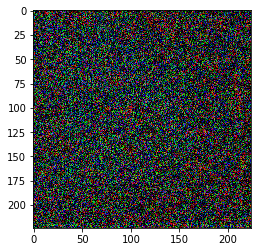

tensor([ 1], device='cuda:0')
Before


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor([[[[-4.3945e-20, -3.2645e-19, -9.5524e-20,  ...,  1.0142e-19,
            2.5930e-21,  2.0571e-19],
          [ 2.9493e-19, -1.6780e-19, -5.7468e-19,  ...,  1.7705e-19,
            5.1962e-20,  2.0525e-21],
          [-1.3020e-20,  3.6079e-19, -2.7516e-19,  ...,  4.4834e-20,
            1.4923e-19,  8.4353e-20],
          ...,
          [ 7.1528e-20, -1.4108e-19,  1.9466e-19,  ...,  1.5785e-19,
            6.6950e-20, -3.3592e-21],
          [-2.2285e-20,  4.1403e-20,  3.5038e-20,  ..., -2.8296e-20,
            1.2769e-20,  2.4156e-20],
          [-3.5093e-20,  9.9429e-20, -4.1182e-20,  ...,  1.0057e-19,
           -5.8725e-20, -1.1049e-19]],

         [[ 7.6465e-20, -2.1828e-19,  4.2997e-19,  ..., -3.7951e-20,
           -1.1188e-21,  1.5350e-20],
          [ 3.5459e-19,  1.0572e-19,  1.2175e-19,  ..., -1.4203e-19,
           -8.4761e-20, -2.5109e-19],
          [ 3.9351e-19,  1.9460e-19, -1.6738e-20,  ..., -2.0551e-19,
           -3.7785e-20,  5.2062e-20],
          ...,
     

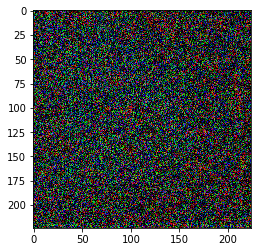

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor([ 1], device='cuda:0')
Before
tensor([[[[-4.3945e-20, -3.2645e-19, -9.5524e-20,  ...,  1.0142e-19,
            2.5930e-21,  2.0571e-19],
          [ 2.9493e-19, -1.6780e-19, -5.7468e-19,  ...,  1.7705e-19,
            5.1962e-20,  2.0523e-21],
          [-1.3020e-20,  3.6079e-19, -2.7516e-19,  ...,  4.4834e-20,
            1.4923e-19,  8.4353e-20],
          ...,
          [ 7.1528e-20, -1.4108e-19,  1.9466e-19,  ...,  1.5785e-19,
            6.6950e-20, -3.3593e-21],
          [-2.2285e-20,  4.1403e-20,  3.5037e-20,  ..., -2.8296e-20,
            1.2769e-20,  2.4156e-20],
          [-3.5093e-20,  9.9429e-20, -4.1182e-20,  ...,  1.0057e-19,
           -5.8726e-20, -1.1049e-19]],

         [[ 7.6464e-20, -2.1828e-19,  4.2997e-19,  ..., -3.7951e-20,
           -1.1189e-21,  1.5350e-20],
          [ 3.5459e-19,  1.0572e-19,  1.2175e-19,  ..., -1.4203e-19,
           -8.4761e-20, -2.5109e-19],
          [ 3.9351e-19,  1.9460e-19, -1.6738e-20,  ..., -2.0551e-19,
           -3.7785e-2

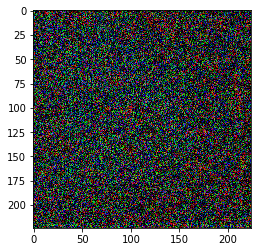

tensor([ 1], device='cuda:0')
Before


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor([[[[-4.3945e-20, -3.2645e-19, -9.5524e-20,  ...,  1.0142e-19,
            2.5930e-21,  2.0571e-19],
          [ 2.9493e-19, -1.6780e-19, -5.7468e-19,  ...,  1.7705e-19,
            5.1962e-20,  2.0525e-21],
          [-1.3019e-20,  3.6079e-19, -2.7516e-19,  ...,  4.4834e-20,
            1.4923e-19,  8.4353e-20],
          ...,
          [ 7.1527e-20, -1.4108e-19,  1.9466e-19,  ...,  1.5785e-19,
            6.6950e-20, -3.3593e-21],
          [-2.2285e-20,  4.1404e-20,  3.5038e-20,  ..., -2.8296e-20,
            1.2769e-20,  2.4156e-20],
          [-3.5093e-20,  9.9429e-20, -4.1182e-20,  ...,  1.0057e-19,
           -5.8726e-20, -1.1049e-19]],

         [[ 7.6464e-20, -2.1828e-19,  4.2997e-19,  ..., -3.7951e-20,
           -1.1188e-21,  1.5350e-20],
          [ 3.5459e-19,  1.0572e-19,  1.2175e-19,  ..., -1.4203e-19,
           -8.4761e-20, -2.5109e-19],
          [ 3.9351e-19,  1.9460e-19, -1.6738e-20,  ..., -2.0551e-19,
           -3.7785e-20,  5.2062e-20],
          ...,
     

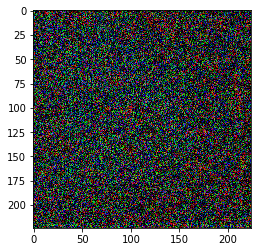

tensor([ 1], device='cuda:0')
Before


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor([[[[-4.3945e-20, -3.2645e-19, -9.5524e-20,  ...,  1.0142e-19,
            2.5931e-21,  2.0571e-19],
          [ 2.9493e-19, -1.6780e-19, -5.7468e-19,  ...,  1.7705e-19,
            5.1962e-20,  2.0523e-21],
          [-1.3020e-20,  3.6079e-19, -2.7516e-19,  ...,  4.4834e-20,
            1.4923e-19,  8.4353e-20],
          ...,
          [ 7.1527e-20, -1.4108e-19,  1.9466e-19,  ...,  1.5785e-19,
            6.6950e-20, -3.3593e-21],
          [-2.2285e-20,  4.1404e-20,  3.5038e-20,  ..., -2.8296e-20,
            1.2769e-20,  2.4156e-20],
          [-3.5093e-20,  9.9429e-20, -4.1182e-20,  ...,  1.0057e-19,
           -5.8726e-20, -1.1049e-19]],

         [[ 7.6465e-20, -2.1828e-19,  4.2997e-19,  ..., -3.7951e-20,
           -1.1189e-21,  1.5350e-20],
          [ 3.5459e-19,  1.0572e-19,  1.2175e-19,  ..., -1.4203e-19,
           -8.4761e-20, -2.5109e-19],
          [ 3.9351e-19,  1.9460e-19, -1.6738e-20,  ..., -2.0551e-19,
           -3.7785e-20,  5.2062e-20],
          ...,
     

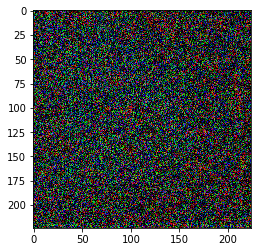

tensor([ 1], device='cuda:0')
Before


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor([[[[-4.3944e-20, -3.2645e-19, -9.5524e-20,  ...,  1.0142e-19,
            2.5930e-21,  2.0571e-19],
          [ 2.9493e-19, -1.6780e-19, -5.7468e-19,  ...,  1.7705e-19,
            5.1962e-20,  2.0524e-21],
          [-1.3019e-20,  3.6079e-19, -2.7516e-19,  ...,  4.4834e-20,
            1.4923e-19,  8.4353e-20],
          ...,
          [ 7.1528e-20, -1.4108e-19,  1.9466e-19,  ...,  1.5785e-19,
            6.6950e-20, -3.3593e-21],
          [-2.2285e-20,  4.1403e-20,  3.5038e-20,  ..., -2.8296e-20,
            1.2769e-20,  2.4156e-20],
          [-3.5093e-20,  9.9429e-20, -4.1182e-20,  ...,  1.0057e-19,
           -5.8726e-20, -1.1049e-19]],

         [[ 7.6465e-20, -2.1828e-19,  4.2997e-19,  ..., -3.7951e-20,
           -1.1188e-21,  1.5350e-20],
          [ 3.5459e-19,  1.0572e-19,  1.2175e-19,  ..., -1.4203e-19,
           -8.4761e-20, -2.5109e-19],
          [ 3.9351e-19,  1.9460e-19, -1.6738e-20,  ..., -2.0551e-19,
           -3.7785e-20,  5.2062e-20],
          ...,
     

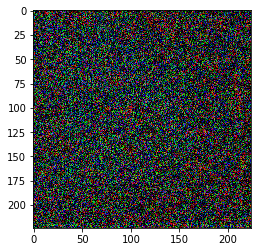

tensor([ 1], device='cuda:0')
Before

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).



tensor([[[[-4.3945e-20, -3.2645e-19, -9.5524e-20,  ...,  1.0142e-19,
            2.5929e-21,  2.0571e-19],
          [ 2.9493e-19, -1.6780e-19, -5.7468e-19,  ...,  1.7705e-19,
            5.1962e-20,  2.0525e-21],
          [-1.3020e-20,  3.6079e-19, -2.7516e-19,  ...,  4.4834e-20,
            1.4923e-19,  8.4353e-20],
          ...,
          [ 7.1528e-20, -1.4108e-19,  1.9466e-19,  ...,  1.5785e-19,
            6.6950e-20, -3.3593e-21],
          [-2.2285e-20,  4.1404e-20,  3.5038e-20,  ..., -2.8296e-20,
            1.2769e-20,  2.4156e-20],
          [-3.5093e-20,  9.9429e-20, -4.1182e-20,  ...,  1.0057e-19,
           -5.8726e-20, -1.1049e-19]],

         [[ 7.6464e-20, -2.1828e-19,  4.2997e-19,  ..., -3.7951e-20,
           -1.1188e-21,  1.5350e-20],
          [ 3.5459e-19,  1.0572e-19,  1.2175e-19,  ..., -1.4203e-19,
           -8.4761e-20, -2.5109e-19],
          [ 3.9351e-19,  1.9460e-19, -1.6738e-20,  ..., -2.0551e-19,
           -3.7785e-20,  5.2062e-20],
          ...,
    

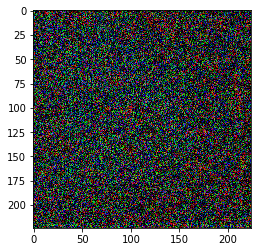

tensor([ 1], device='cuda:0')
Before


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor([[[[-4.3944e-20, -3.2645e-19, -9.5524e-20,  ...,  1.0142e-19,
            2.5929e-21,  2.0571e-19],
          [ 2.9493e-19, -1.6780e-19, -5.7468e-19,  ...,  1.7705e-19,
            5.1962e-20,  2.0524e-21],
          [-1.3020e-20,  3.6079e-19, -2.7516e-19,  ...,  4.4834e-20,
            1.4923e-19,  8.4353e-20],
          ...,
          [ 7.1528e-20, -1.4108e-19,  1.9466e-19,  ...,  1.5785e-19,
            6.6950e-20, -3.3593e-21],
          [-2.2285e-20,  4.1403e-20,  3.5038e-20,  ..., -2.8296e-20,
            1.2769e-20,  2.4156e-20],
          [-3.5093e-20,  9.9429e-20, -4.1182e-20,  ...,  1.0057e-19,
           -5.8726e-20, -1.1049e-19]],

         [[ 7.6465e-20, -2.1828e-19,  4.2997e-19,  ..., -3.7951e-20,
           -1.1187e-21,  1.5350e-20],
          [ 3.5459e-19,  1.0572e-19,  1.2175e-19,  ..., -1.4203e-19,
           -8.4761e-20, -2.5109e-19],
          [ 3.9351e-19,  1.9460e-19, -1.6738e-20,  ..., -2.0551e-19,
           -3.7785e-20,  5.2062e-20],
          ...,
     

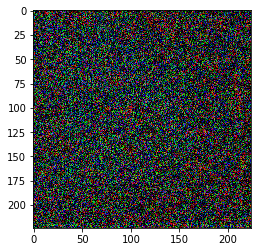

tensor([ 1], device='cuda:0')
Before
tensor([[[[-4.3945e-20, -3.2645e-19, -9.5524e-20,  ...,  1.0142e-19,
            2.5931e-21,  2.0571e-19],
          [ 2.9493e-19, -1.6780e-19, -5.7468e-19,  ...,  1.7705e-19,
            5.1962e-20,  2.0524e-21],
          [-1.3019e-20,  3.6079e-19, -2.7516e-19,  ...,  4.4834e-20,
            1.4923e-19,  8.4353e-20],
          ...,
          [ 7.1528e-20, -1.4108e-19,  1.9466e-19,  ...,  1.5785e-19,
            6.6950e-20, -3.3593e-21],
          [-2.2285e-20,  4.1404e-20,  3.5038e-20,  ..., -2.8296e-20,
            1.2769e-20,  2.4156e-20],
          [-3.5093e-20,  9.9429e-20, -4.1181e-20,  ...,  1.0057e-19,
           -5.8726e-20, -1.1049e-19]],

         [[ 7.6464e-20, -2.1828e-19,  4.2997e-19,  ..., -3.7951e-20,
           -1.1188e-21,  1.5350e-20],
          [ 3.5459e-19,  1.0572e-19,  1.2175e-19,  ..., -1.4203e-19,
           -8.4761e-20, -2.5109e-19],
          [ 3.9351e-19,  1.9460e-19, -1.6738e-20,  ..., -2.0551e-19,
           -3.7785e-2

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


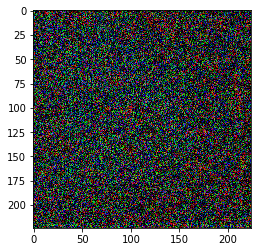

tensor([ 1], device='cuda:0')
Before


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor([[[[-4.3945e-20, -3.2645e-19, -9.5524e-20,  ...,  1.0142e-19,
            2.5930e-21,  2.0571e-19],
          [ 2.9493e-19, -1.6780e-19, -5.7468e-19,  ...,  1.7705e-19,
            5.1962e-20,  2.0524e-21],
          [-1.3020e-20,  3.6079e-19, -2.7516e-19,  ...,  4.4834e-20,
            1.4923e-19,  8.4353e-20],
          ...,
          [ 7.1527e-20, -1.4108e-19,  1.9466e-19,  ...,  1.5785e-19,
            6.6950e-20, -3.3593e-21],
          [-2.2285e-20,  4.1404e-20,  3.5038e-20,  ..., -2.8296e-20,
            1.2769e-20,  2.4156e-20],
          [-3.5093e-20,  9.9429e-20, -4.1182e-20,  ...,  1.0057e-19,
           -5.8726e-20, -1.1049e-19]],

         [[ 7.6464e-20, -2.1828e-19,  4.2997e-19,  ..., -3.7951e-20,
           -1.1188e-21,  1.5350e-20],
          [ 3.5459e-19,  1.0572e-19,  1.2175e-19,  ..., -1.4203e-19,
           -8.4761e-20, -2.5109e-19],
          [ 3.9351e-19,  1.9460e-19, -1.6738e-20,  ..., -2.0551e-19,
           -3.7785e-20,  5.2062e-20],
          ...,
     

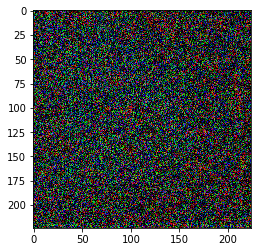

tensor([ 1], device='cuda:0')
Before


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor([[[[-4.3945e-20, -3.2645e-19, -9.5524e-20,  ...,  1.0142e-19,
            2.5930e-21,  2.0571e-19],
          [ 2.9493e-19, -1.6780e-19, -5.7468e-19,  ...,  1.7705e-19,
            5.1962e-20,  2.0525e-21],
          [-1.3020e-20,  3.6079e-19, -2.7516e-19,  ...,  4.4834e-20,
            1.4923e-19,  8.4353e-20],
          ...,
          [ 7.1527e-20, -1.4108e-19,  1.9466e-19,  ...,  1.5785e-19,
            6.6950e-20, -3.3593e-21],
          [-2.2285e-20,  4.1404e-20,  3.5038e-20,  ..., -2.8296e-20,
            1.2769e-20,  2.4156e-20],
          [-3.5093e-20,  9.9429e-20, -4.1182e-20,  ...,  1.0057e-19,
           -5.8725e-20, -1.1049e-19]],

         [[ 7.6464e-20, -2.1828e-19,  4.2997e-19,  ..., -3.7951e-20,
           -1.1188e-21,  1.5350e-20],
          [ 3.5459e-19,  1.0572e-19,  1.2175e-19,  ..., -1.4203e-19,
           -8.4761e-20, -2.5109e-19],
          [ 3.9351e-19,  1.9460e-19, -1.6738e-20,  ..., -2.0551e-19,
           -3.7785e-20,  5.2062e-20],
          ...,
     

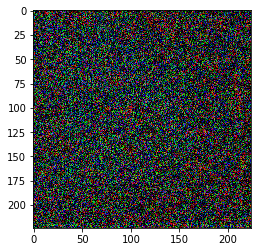

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor([ 1], device='cuda:0')
Before
tensor([[[[-4.3945e-20, -3.2645e-19, -9.5524e-20,  ...,  1.0142e-19,
            2.5930e-21,  2.0571e-19],
          [ 2.9493e-19, -1.6780e-19, -5.7468e-19,  ...,  1.7705e-19,
            5.1962e-20,  2.0523e-21],
          [-1.3020e-20,  3.6079e-19, -2.7516e-19,  ...,  4.4834e-20,
            1.4923e-19,  8.4353e-20],
          ...,
          [ 7.1527e-20, -1.4108e-19,  1.9466e-19,  ...,  1.5785e-19,
            6.6950e-20, -3.3593e-21],
          [-2.2285e-20,  4.1404e-20,  3.5038e-20,  ..., -2.8296e-20,
            1.2769e-20,  2.4156e-20],
          [-3.5093e-20,  9.9429e-20, -4.1182e-20,  ...,  1.0057e-19,
           -5.8726e-20, -1.1049e-19]],

         [[ 7.6464e-20, -2.1828e-19,  4.2997e-19,  ..., -3.7951e-20,
           -1.1188e-21,  1.5350e-20],
          [ 3.5459e-19,  1.0572e-19,  1.2175e-19,  ..., -1.4203e-19,
           -8.4761e-20, -2.5109e-19],
          [ 3.9351e-19,  1.9460e-19, -1.6738e-20,  ..., -2.0551e-19,
           -3.7785e-2

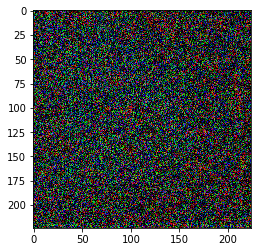

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor([ 1], device='cuda:0')
Before
tensor([[[[-4.3944e-20, -3.2645e-19, -9.5524e-20,  ...,  1.0142e-19,
            2.5930e-21,  2.0571e-19],
          [ 2.9493e-19, -1.6780e-19, -5.7468e-19,  ...,  1.7705e-19,
            5.1962e-20,  2.0525e-21],
          [-1.3019e-20,  3.6079e-19, -2.7516e-19,  ...,  4.4834e-20,
            1.4923e-19,  8.4353e-20],
          ...,
          [ 7.1527e-20, -1.4108e-19,  1.9466e-19,  ...,  1.5785e-19,
            6.6950e-20, -3.3593e-21],
          [-2.2285e-20,  4.1404e-20,  3.5038e-20,  ..., -2.8296e-20,
            1.2769e-20,  2.4156e-20],
          [-3.5093e-20,  9.9429e-20, -4.1182e-20,  ...,  1.0057e-19,
           -5.8726e-20, -1.1049e-19]],

         [[ 7.6465e-20, -2.1828e-19,  4.2997e-19,  ..., -3.7951e-20,
           -1.1188e-21,  1.5350e-20],
          [ 3.5459e-19,  1.0572e-19,  1.2175e-19,  ..., -1.4203e-19,
           -8.4761e-20, -2.5109e-19],
          [ 3.9351e-19,  1.9460e-19, -1.6738e-20,  ..., -2.0551e-19,
           -3.7785e-2

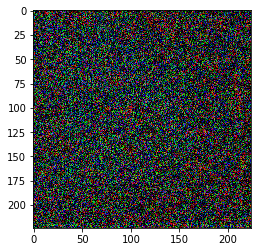

tensor([ 1], device='cuda:0')
Before


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor([[[[-4.3945e-20, -3.2645e-19, -9.5524e-20,  ...,  1.0142e-19,
            2.5931e-21,  2.0571e-19],
          [ 2.9493e-19, -1.6780e-19, -5.7468e-19,  ...,  1.7705e-19,
            5.1962e-20,  2.0524e-21],
          [-1.3020e-20,  3.6079e-19, -2.7516e-19,  ...,  4.4834e-20,
            1.4923e-19,  8.4353e-20],
          ...,
          [ 7.1527e-20, -1.4108e-19,  1.9466e-19,  ...,  1.5785e-19,
            6.6950e-20, -3.3593e-21],
          [-2.2285e-20,  4.1404e-20,  3.5038e-20,  ..., -2.8296e-20,
            1.2769e-20,  2.4156e-20],
          [-3.5093e-20,  9.9429e-20, -4.1182e-20,  ...,  1.0057e-19,
           -5.8726e-20, -1.1049e-19]],

         [[ 7.6464e-20, -2.1828e-19,  4.2997e-19,  ..., -3.7951e-20,
           -1.1189e-21,  1.5350e-20],
          [ 3.5459e-19,  1.0572e-19,  1.2175e-19,  ..., -1.4203e-19,
           -8.4761e-20, -2.5109e-19],
          [ 3.9351e-19,  1.9460e-19, -1.6738e-20,  ..., -2.0551e-19,
           -3.7785e-20,  5.2062e-20],
          ...,
     

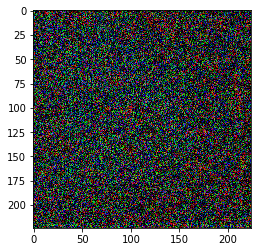

tensor([ 1], device='cuda:0')
Before


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor([[[[-4.3945e-20, -3.2645e-19, -9.5524e-20,  ...,  1.0142e-19,
            2.5930e-21,  2.0571e-19],
          [ 2.9493e-19, -1.6780e-19, -5.7468e-19,  ...,  1.7705e-19,
            5.1962e-20,  2.0525e-21],
          [-1.3020e-20,  3.6079e-19, -2.7516e-19,  ...,  4.4834e-20,
            1.4923e-19,  8.4353e-20],
          ...,
          [ 7.1527e-20, -1.4108e-19,  1.9466e-19,  ...,  1.5785e-19,
            6.6950e-20, -3.3592e-21],
          [-2.2285e-20,  4.1404e-20,  3.5038e-20,  ..., -2.8296e-20,
            1.2769e-20,  2.4156e-20],
          [-3.5093e-20,  9.9429e-20, -4.1182e-20,  ...,  1.0057e-19,
           -5.8726e-20, -1.1049e-19]],

         [[ 7.6465e-20, -2.1828e-19,  4.2997e-19,  ..., -3.7952e-20,
           -1.1188e-21,  1.5350e-20],
          [ 3.5459e-19,  1.0572e-19,  1.2175e-19,  ..., -1.4203e-19,
           -8.4761e-20, -2.5109e-19],
          [ 3.9351e-19,  1.9460e-19, -1.6738e-20,  ..., -2.0551e-19,
           -3.7785e-20,  5.2062e-20],
          ...,
     

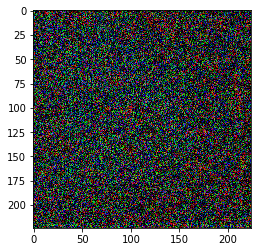

tensor([ 1], device='cuda:0')
Before


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor([[[[-4.3945e-20, -3.2645e-19, -9.5524e-20,  ...,  1.0142e-19,
            2.5930e-21,  2.0571e-19],
          [ 2.9493e-19, -1.6780e-19, -5.7468e-19,  ...,  1.7705e-19,
            5.1962e-20,  2.0524e-21],
          [-1.3019e-20,  3.6079e-19, -2.7516e-19,  ...,  4.4834e-20,
            1.4923e-19,  8.4353e-20],
          ...,
          [ 7.1527e-20, -1.4108e-19,  1.9466e-19,  ...,  1.5785e-19,
            6.6950e-20, -3.3593e-21],
          [-2.2285e-20,  4.1403e-20,  3.5038e-20,  ..., -2.8296e-20,
            1.2769e-20,  2.4156e-20],
          [-3.5093e-20,  9.9429e-20, -4.1182e-20,  ...,  1.0057e-19,
           -5.8726e-20, -1.1049e-19]],

         [[ 7.6464e-20, -2.1828e-19,  4.2997e-19,  ..., -3.7951e-20,
           -1.1188e-21,  1.5350e-20],
          [ 3.5459e-19,  1.0572e-19,  1.2175e-19,  ..., -1.4203e-19,
           -8.4761e-20, -2.5109e-19],
          [ 3.9351e-19,  1.9460e-19, -1.6738e-20,  ..., -2.0551e-19,
           -3.7785e-20,  5.2062e-20],
          ...,
     

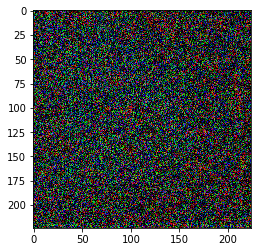

tensor([ 1], device='cuda:0')
Before


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor([[[[-4.3944e-20, -3.2645e-19, -9.5524e-20,  ...,  1.0142e-19,
            2.5930e-21,  2.0571e-19],
          [ 2.9493e-19, -1.6780e-19, -5.7468e-19,  ...,  1.7705e-19,
            5.1962e-20,  2.0524e-21],
          [-1.3019e-20,  3.6079e-19, -2.7516e-19,  ...,  4.4834e-20,
            1.4923e-19,  8.4353e-20],
          ...,
          [ 7.1527e-20, -1.4108e-19,  1.9466e-19,  ...,  1.5785e-19,
            6.6950e-20, -3.3592e-21],
          [-2.2285e-20,  4.1404e-20,  3.5038e-20,  ..., -2.8296e-20,
            1.2769e-20,  2.4156e-20],
          [-3.5093e-20,  9.9429e-20, -4.1182e-20,  ...,  1.0057e-19,
           -5.8726e-20, -1.1049e-19]],

         [[ 7.6465e-20, -2.1828e-19,  4.2997e-19,  ..., -3.7951e-20,
           -1.1189e-21,  1.5350e-20],
          [ 3.5459e-19,  1.0572e-19,  1.2175e-19,  ..., -1.4203e-19,
           -8.4761e-20, -2.5109e-19],
          [ 3.9351e-19,  1.9460e-19, -1.6738e-20,  ..., -2.0551e-19,
           -3.7785e-20,  5.2062e-20],
          ...,
     

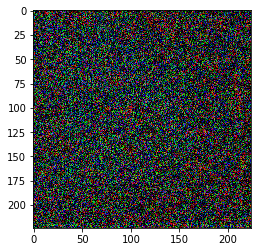

tensor([ 1], device='cuda:0')


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Before
tensor([[[[-4.3944e-20, -3.2645e-19, -9.5524e-20,  ...,  1.0142e-19,
            2.5930e-21,  2.0571e-19],
          [ 2.9493e-19, -1.6780e-19, -5.7468e-19,  ...,  1.7705e-19,
            5.1962e-20,  2.0524e-21],
          [-1.3019e-20,  3.6079e-19, -2.7516e-19,  ...,  4.4834e-20,
            1.4923e-19,  8.4353e-20],
          ...,
          [ 7.1527e-20, -1.4108e-19,  1.9466e-19,  ...,  1.5785e-19,
            6.6950e-20, -3.3593e-21],
          [-2.2285e-20,  4.1403e-20,  3.5038e-20,  ..., -2.8296e-20,
            1.2769e-20,  2.4156e-20],
          [-3.5093e-20,  9.9429e-20, -4.1182e-20,  ...,  1.0057e-19,
           -5.8726e-20, -1.1049e-19]],

         [[ 7.6464e-20, -2.1828e-19,  4.2997e-19,  ..., -3.7951e-20,
           -1.1188e-21,  1.5350e-20],
          [ 3.5459e-19,  1.0572e-19,  1.2175e-19,  ..., -1.4203e-19,
           -8.4761e-20, -2.5109e-19],
          [ 3.9351e-19,  1.9460e-19, -1.6738e-20,  ..., -2.0551e-19,
           -3.7785e-20,  5.2062e-20],
          ...

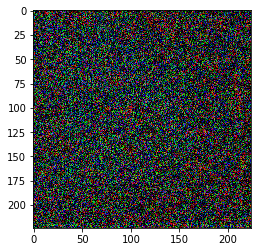

tensor([ 1], device='cuda:0')
Before


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor([[[[-4.3944e-20, -3.2645e-19, -9.5524e-20,  ...,  1.0142e-19,
            2.5929e-21,  2.0571e-19],
          [ 2.9493e-19, -1.6780e-19, -5.7468e-19,  ...,  1.7705e-19,
            5.1962e-20,  2.0524e-21],
          [-1.3020e-20,  3.6079e-19, -2.7516e-19,  ...,  4.4834e-20,
            1.4923e-19,  8.4353e-20],
          ...,
          [ 7.1527e-20, -1.4108e-19,  1.9466e-19,  ...,  1.5785e-19,
            6.6950e-20, -3.3593e-21],
          [-2.2285e-20,  4.1404e-20,  3.5038e-20,  ..., -2.8296e-20,
            1.2769e-20,  2.4156e-20],
          [-3.5093e-20,  9.9429e-20, -4.1182e-20,  ...,  1.0057e-19,
           -5.8726e-20, -1.1049e-19]],

         [[ 7.6465e-20, -2.1828e-19,  4.2997e-19,  ..., -3.7951e-20,
           -1.1188e-21,  1.5350e-20],
          [ 3.5459e-19,  1.0572e-19,  1.2175e-19,  ..., -1.4203e-19,
           -8.4761e-20, -2.5109e-19],
          [ 3.9351e-19,  1.9460e-19, -1.6738e-20,  ..., -2.0551e-19,
           -3.7785e-20,  5.2062e-20],
          ...,
     

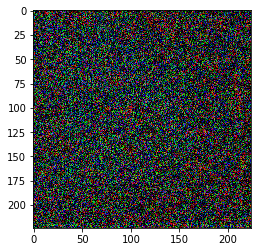

tensor([ 1], device='cuda:0')
Before


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor([[[[-4.3944e-20, -3.2645e-19, -9.5524e-20,  ...,  1.0142e-19,
            2.5928e-21,  2.0571e-19],
          [ 2.9493e-19, -1.6780e-19, -5.7468e-19,  ...,  1.7705e-19,
            5.1962e-20,  2.0525e-21],
          [-1.3020e-20,  3.6079e-19, -2.7516e-19,  ...,  4.4834e-20,
            1.4923e-19,  8.4353e-20],
          ...,
          [ 7.1527e-20, -1.4108e-19,  1.9466e-19,  ...,  1.5785e-19,
            6.6950e-20, -3.3593e-21],
          [-2.2285e-20,  4.1403e-20,  3.5038e-20,  ..., -2.8296e-20,
            1.2769e-20,  2.4156e-20],
          [-3.5093e-20,  9.9429e-20, -4.1182e-20,  ...,  1.0057e-19,
           -5.8726e-20, -1.1049e-19]],

         [[ 7.6465e-20, -2.1828e-19,  4.2997e-19,  ..., -3.7951e-20,
           -1.1187e-21,  1.5350e-20],
          [ 3.5459e-19,  1.0572e-19,  1.2175e-19,  ..., -1.4203e-19,
           -8.4761e-20, -2.5109e-19],
          [ 3.9351e-19,  1.9460e-19, -1.6738e-20,  ..., -2.0551e-19,
           -3.7785e-20,  5.2063e-20],
          ...,
     

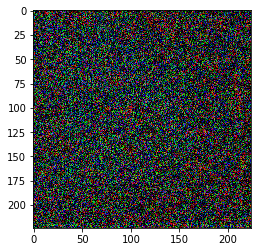

tensor([ 1], device='cuda:0')
Before


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor([[[[-4.3945e-20, -3.2645e-19, -9.5524e-20,  ...,  1.0142e-19,
            2.5930e-21,  2.0571e-19],
          [ 2.9493e-19, -1.6780e-19, -5.7468e-19,  ...,  1.7705e-19,
            5.1962e-20,  2.0524e-21],
          [-1.3019e-20,  3.6079e-19, -2.7516e-19,  ...,  4.4834e-20,
            1.4923e-19,  8.4353e-20],
          ...,
          [ 7.1527e-20, -1.4108e-19,  1.9466e-19,  ...,  1.5785e-19,
            6.6950e-20, -3.3593e-21],
          [-2.2285e-20,  4.1404e-20,  3.5038e-20,  ..., -2.8296e-20,
            1.2769e-20,  2.4156e-20],
          [-3.5093e-20,  9.9429e-20, -4.1182e-20,  ...,  1.0057e-19,
           -5.8726e-20, -1.1049e-19]],

         [[ 7.6464e-20, -2.1828e-19,  4.2997e-19,  ..., -3.7951e-20,
           -1.1187e-21,  1.5350e-20],
          [ 3.5459e-19,  1.0572e-19,  1.2175e-19,  ..., -1.4203e-19,
           -8.4761e-20, -2.5109e-19],
          [ 3.9351e-19,  1.9460e-19, -1.6738e-20,  ..., -2.0551e-19,
           -3.7785e-20,  5.2062e-20],
          ...,
     

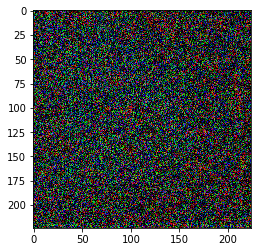

tensor([ 1], device='cuda:0')
Before
tensor([[[[-4.3944e-20, -3.2645e-19, -9.5524e-20,  ...,  1.0142e-19,
            2.5930e-21,  2.0571e-19],
          [ 2.9493e-19, -1.6780e-19, -5.7468e-19,  ...,  1.7705e-19,
            5.1962e-20,  2.0524e-21],
          [-1.3019e-20,  3.6079e-19, -2.7516e-19,  ...,  4.4834e-20,
            1.4923e-19,  8.4353e-20],
          ...,
          [ 7.1527e-20, -1.4108e-19,  1.9466e-19,  ...,  1.5785e-19,
            6.6950e-20, -3.3593e-21],
          [-2.2285e-20,  4.1403e-20,  3.5038e-20,  ..., -2.8296e-20,
            1.2769e-20,  2.4156e-20],
          [-3.5093e-20,  9.9429e-20, -4.1182e-20,  ...,  1.0057e-19,
           -5.8726e-20, -1.1049e-19]],

         [[ 7.6465e-20, -2.1828e-19,  4.2997e-19,  ..., -3.7951e-20,
           -1.1188e-21,  1.5350e-20],
          [ 3.5459e-19,  1.0572e-19,  1.2175e-19,  ..., -1.4203e-19,
           -8.4761e-20, -2.5109e-19],
          [ 3.9351e-19,  1.9460e-19, -1.6738e-20,  ..., -2.0551e-19,
           -3.7785e-2

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


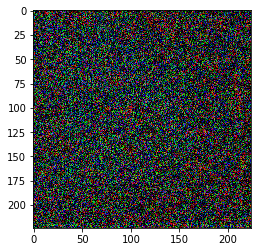

tensor([ 1], device='cuda:0')
Before


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor([[[[-4.3944e-20, -3.2645e-19, -9.5524e-20,  ...,  1.0142e-19,
            2.5930e-21,  2.0571e-19],
          [ 2.9493e-19, -1.6780e-19, -5.7468e-19,  ...,  1.7705e-19,
            5.1962e-20,  2.0524e-21],
          [-1.3019e-20,  3.6079e-19, -2.7516e-19,  ...,  4.4834e-20,
            1.4923e-19,  8.4353e-20],
          ...,
          [ 7.1527e-20, -1.4108e-19,  1.9466e-19,  ...,  1.5785e-19,
            6.6950e-20, -3.3593e-21],
          [-2.2285e-20,  4.1403e-20,  3.5038e-20,  ..., -2.8296e-20,
            1.2769e-20,  2.4156e-20],
          [-3.5093e-20,  9.9429e-20, -4.1182e-20,  ...,  1.0057e-19,
           -5.8726e-20, -1.1049e-19]],

         [[ 7.6464e-20, -2.1828e-19,  4.2997e-19,  ..., -3.7951e-20,
           -1.1188e-21,  1.5350e-20],
          [ 3.5459e-19,  1.0572e-19,  1.2175e-19,  ..., -1.4203e-19,
           -8.4761e-20, -2.5109e-19],
          [ 3.9351e-19,  1.9460e-19, -1.6738e-20,  ..., -2.0551e-19,
           -3.7785e-20,  5.2062e-20],
          ...,
     

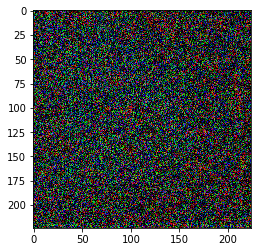

tensor([ 1], device='cuda:0')
Before
tensor([[[[-4.3945e-20, -3.2645e-19, -9.5524e-20,  ...,  1.0142e-19,
            2.5930e-21,  2.0571e-19],
          [ 2.9493e-19, -1.6780e-19, -5.7468e-19,  ...,  1.7705e-19,
            5.1962e-20,  2.0524e-21],
          [-1.3020e-20,  3.6079e-19, -2.7516e-19,  ...,  4.4834e-20,
            1.4923e-19,  8.4353e-20],
          ...,
          [ 7.1528e-20, -1.4108e-19,  1.9466e-19,  ...,  1.5785e-19,
            6.6950e-20, -3.3593e-21],
          [-2.2285e-20,  4.1404e-20,  3.5038e-20,  ..., -2.8296e-20,
            1.2769e-20,  2.4156e-20],
          [-3.5093e-20,  9.9429e-20, -4.1182e-20,  ...,  1.0057e-19,
           -5.8726e-20, -1.1049e-19]],

         [[ 7.6464e-20, -2.1828e-19,  4.2997e-19,  ..., -3.7951e-20,
           -1.1188e-21,  1.5350e-20],
          [ 3.5459e-19,  1.0572e-19,  1.2175e-19,  ..., -1.4203e-19,
           -8.4761e-20, -2.5109e-19],
          [ 3.9351e-19,  1.9460e-19, -1.6738e-20,  ..., -2.0551e-19,
           -3.7785e-2

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


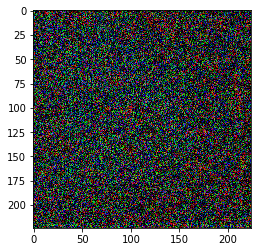

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor([ 1], device='cuda:0')
Before
tensor([[[[-4.3944e-20, -3.2645e-19, -9.5524e-20,  ...,  1.0142e-19,
            2.5930e-21,  2.0571e-19],
          [ 2.9493e-19, -1.6780e-19, -5.7468e-19,  ...,  1.7705e-19,
            5.1962e-20,  2.0524e-21],
          [-1.3020e-20,  3.6079e-19, -2.7516e-19,  ...,  4.4834e-20,
            1.4923e-19,  8.4354e-20],
          ...,
          [ 7.1527e-20, -1.4108e-19,  1.9466e-19,  ...,  1.5785e-19,
            6.6950e-20, -3.3593e-21],
          [-2.2285e-20,  4.1404e-20,  3.5038e-20,  ..., -2.8296e-20,
            1.2769e-20,  2.4156e-20],
          [-3.5093e-20,  9.9429e-20, -4.1182e-20,  ...,  1.0057e-19,
           -5.8726e-20, -1.1049e-19]],

         [[ 7.6465e-20, -2.1828e-19,  4.2997e-19,  ..., -3.7951e-20,
           -1.1189e-21,  1.5350e-20],
          [ 3.5459e-19,  1.0572e-19,  1.2175e-19,  ..., -1.4203e-19,
           -8.4761e-20, -2.5109e-19],
          [ 3.9351e-19,  1.9460e-19, -1.6738e-20,  ..., -2.0551e-19,
           -3.7785e-2

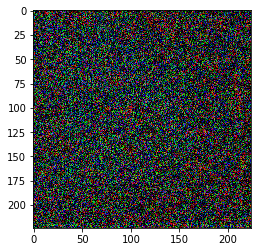

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor([ 1], device='cuda:0')
Before
tensor([[[[-4.3944e-20, -3.2645e-19, -9.5524e-20,  ...,  1.0142e-19,
            2.5930e-21,  2.0571e-19],
          [ 2.9493e-19, -1.6780e-19, -5.7468e-19,  ...,  1.7705e-19,
            5.1962e-20,  2.0525e-21],
          [-1.3020e-20,  3.6079e-19, -2.7516e-19,  ...,  4.4834e-20,
            1.4923e-19,  8.4353e-20],
          ...,
          [ 7.1527e-20, -1.4108e-19,  1.9466e-19,  ...,  1.5785e-19,
            6.6950e-20, -3.3593e-21],
          [-2.2285e-20,  4.1404e-20,  3.5038e-20,  ..., -2.8296e-20,
            1.2769e-20,  2.4156e-20],
          [-3.5093e-20,  9.9429e-20, -4.1182e-20,  ...,  1.0057e-19,
           -5.8726e-20, -1.1049e-19]],

         [[ 7.6464e-20, -2.1828e-19,  4.2997e-19,  ..., -3.7951e-20,
           -1.1188e-21,  1.5350e-20],
          [ 3.5459e-19,  1.0572e-19,  1.2175e-19,  ..., -1.4203e-19,
           -8.4761e-20, -2.5109e-19],
          [ 3.9351e-19,  1.9460e-19, -1.6738e-20,  ..., -2.0551e-19,
           -3.7785e-2

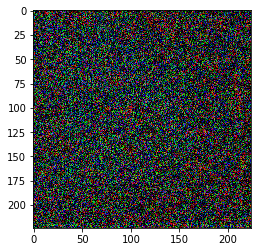

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor([ 1], device='cuda:0')
Before
tensor([[[[-4.3944e-20, -3.2645e-19, -9.5524e-20,  ...,  1.0142e-19,
            2.5930e-21,  2.0571e-19],
          [ 2.9493e-19, -1.6780e-19, -5.7468e-19,  ...,  1.7705e-19,
            5.1962e-20,  2.0525e-21],
          [-1.3020e-20,  3.6079e-19, -2.7516e-19,  ...,  4.4834e-20,
            1.4923e-19,  8.4353e-20],
          ...,
          [ 7.1527e-20, -1.4108e-19,  1.9466e-19,  ...,  1.5785e-19,
            6.6950e-20, -3.3593e-21],
          [-2.2285e-20,  4.1404e-20,  3.5037e-20,  ..., -2.8296e-20,
            1.2769e-20,  2.4156e-20],
          [-3.5093e-20,  9.9429e-20, -4.1182e-20,  ...,  1.0057e-19,
           -5.8726e-20, -1.1049e-19]],

         [[ 7.6465e-20, -2.1828e-19,  4.2997e-19,  ..., -3.7952e-20,
           -1.1189e-21,  1.5350e-20],
          [ 3.5459e-19,  1.0572e-19,  1.2175e-19,  ..., -1.4203e-19,
           -8.4761e-20, -2.5109e-19],
          [ 3.9351e-19,  1.9460e-19, -1.6737e-20,  ..., -2.0551e-19,
           -3.7785e-2

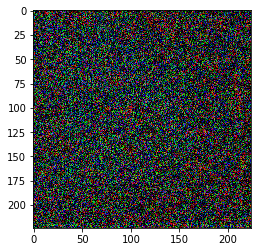

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor([ 1], device='cuda:0')
Before
tensor([[[[-4.3944e-20, -3.2645e-19, -9.5524e-20,  ...,  1.0142e-19,
            2.5930e-21,  2.0571e-19],
          [ 2.9493e-19, -1.6780e-19, -5.7468e-19,  ...,  1.7705e-19,
            5.1962e-20,  2.0524e-21],
          [-1.3019e-20,  3.6079e-19, -2.7516e-19,  ...,  4.4834e-20,
            1.4923e-19,  8.4353e-20],
          ...,
          [ 7.1527e-20, -1.4108e-19,  1.9466e-19,  ...,  1.5785e-19,
            6.6950e-20, -3.3593e-21],
          [-2.2285e-20,  4.1403e-20,  3.5038e-20,  ..., -2.8296e-20,
            1.2769e-20,  2.4156e-20],
          [-3.5093e-20,  9.9429e-20, -4.1182e-20,  ...,  1.0057e-19,
           -5.8726e-20, -1.1049e-19]],

         [[ 7.6465e-20, -2.1828e-19,  4.2997e-19,  ..., -3.7951e-20,
           -1.1188e-21,  1.5350e-20],
          [ 3.5459e-19,  1.0572e-19,  1.2175e-19,  ..., -1.4203e-19,
           -8.4761e-20, -2.5109e-19],
          [ 3.9351e-19,  1.9460e-19, -1.6738e-20,  ..., -2.0551e-19,
           -3.7785e-2

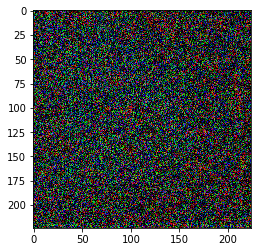

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor([ 1], device='cuda:0')
Before
tensor([[[[-4.3944e-20, -3.2645e-19, -9.5524e-20,  ...,  1.0142e-19,
            2.5930e-21,  2.0571e-19],
          [ 2.9493e-19, -1.6780e-19, -5.7468e-19,  ...,  1.7705e-19,
            5.1962e-20,  2.0525e-21],
          [-1.3020e-20,  3.6079e-19, -2.7516e-19,  ...,  4.4834e-20,
            1.4923e-19,  8.4353e-20],
          ...,
          [ 7.1527e-20, -1.4108e-19,  1.9466e-19,  ...,  1.5785e-19,
            6.6950e-20, -3.3593e-21],
          [-2.2285e-20,  4.1404e-20,  3.5037e-20,  ..., -2.8296e-20,
            1.2769e-20,  2.4156e-20],
          [-3.5093e-20,  9.9429e-20, -4.1182e-20,  ...,  1.0057e-19,
           -5.8726e-20, -1.1049e-19]],

         [[ 7.6465e-20, -2.1828e-19,  4.2997e-19,  ..., -3.7951e-20,
           -1.1188e-21,  1.5350e-20],
          [ 3.5459e-19,  1.0572e-19,  1.2175e-19,  ..., -1.4203e-19,
           -8.4761e-20, -2.5109e-19],
          [ 3.9351e-19,  1.9460e-19, -1.6738e-20,  ..., -2.0551e-19,
           -3.7785e-2

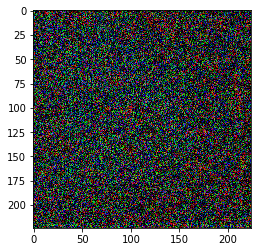

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor([ 1], device='cuda:0')
Before
tensor([[[[-4.3945e-20, -3.2645e-19, -9.5524e-20,  ...,  1.0142e-19,
            2.5930e-21,  2.0571e-19],
          [ 2.9493e-19, -1.6780e-19, -5.7468e-19,  ...,  1.7705e-19,
            5.1962e-20,  2.0525e-21],
          [-1.3019e-20,  3.6079e-19, -2.7516e-19,  ...,  4.4834e-20,
            1.4923e-19,  8.4353e-20],
          ...,
          [ 7.1528e-20, -1.4108e-19,  1.9466e-19,  ...,  1.5785e-19,
            6.6950e-20, -3.3593e-21],
          [-2.2285e-20,  4.1403e-20,  3.5038e-20,  ..., -2.8296e-20,
            1.2769e-20,  2.4156e-20],
          [-3.5093e-20,  9.9429e-20, -4.1182e-20,  ...,  1.0057e-19,
           -5.8726e-20, -1.1049e-19]],

         [[ 7.6465e-20, -2.1828e-19,  4.2997e-19,  ..., -3.7951e-20,
           -1.1188e-21,  1.5350e-20],
          [ 3.5459e-19,  1.0572e-19,  1.2175e-19,  ..., -1.4203e-19,
           -8.4761e-20, -2.5109e-19],
          [ 3.9351e-19,  1.9460e-19, -1.6738e-20,  ..., -2.0551e-19,
           -3.7785e-2

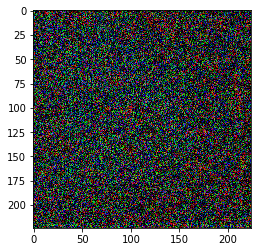

tensor([ 1], device='cuda:0')
Before


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor([[[[-4.3944e-20, -3.2645e-19, -9.5524e-20,  ...,  1.0142e-19,
            2.5930e-21,  2.0571e-19],
          [ 2.9493e-19, -1.6780e-19, -5.7468e-19,  ...,  1.7705e-19,
            5.1962e-20,  2.0523e-21],
          [-1.3020e-20,  3.6079e-19, -2.7516e-19,  ...,  4.4834e-20,
            1.4923e-19,  8.4353e-20],
          ...,
          [ 7.1527e-20, -1.4108e-19,  1.9466e-19,  ...,  1.5785e-19,
            6.6950e-20, -3.3593e-21],
          [-2.2285e-20,  4.1403e-20,  3.5038e-20,  ..., -2.8296e-20,
            1.2769e-20,  2.4156e-20],
          [-3.5093e-20,  9.9429e-20, -4.1182e-20,  ...,  1.0057e-19,
           -5.8726e-20, -1.1049e-19]],

         [[ 7.6465e-20, -2.1828e-19,  4.2997e-19,  ..., -3.7951e-20,
           -1.1188e-21,  1.5350e-20],
          [ 3.5459e-19,  1.0572e-19,  1.2175e-19,  ..., -1.4203e-19,
           -8.4761e-20, -2.5109e-19],
          [ 3.9351e-19,  1.9460e-19, -1.6738e-20,  ..., -2.0551e-19,
           -3.7785e-20,  5.2062e-20],
          ...,
     

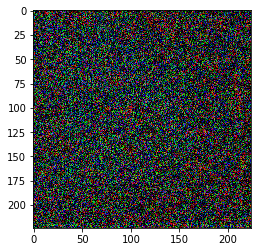

tensor([ 1], device='cuda:0')
Before


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor([[[[-4.3944e-20, -3.2645e-19, -9.5524e-20,  ...,  1.0142e-19,
            2.5929e-21,  2.0571e-19],
          [ 2.9493e-19, -1.6780e-19, -5.7468e-19,  ...,  1.7705e-19,
            5.1962e-20,  2.0524e-21],
          [-1.3020e-20,  3.6079e-19, -2.7516e-19,  ...,  4.4834e-20,
            1.4923e-19,  8.4353e-20],
          ...,
          [ 7.1527e-20, -1.4108e-19,  1.9466e-19,  ...,  1.5785e-19,
            6.6950e-20, -3.3593e-21],
          [-2.2285e-20,  4.1403e-20,  3.5038e-20,  ..., -2.8296e-20,
            1.2769e-20,  2.4156e-20],
          [-3.5093e-20,  9.9429e-20, -4.1182e-20,  ...,  1.0057e-19,
           -5.8726e-20, -1.1049e-19]],

         [[ 7.6465e-20, -2.1828e-19,  4.2997e-19,  ..., -3.7951e-20,
           -1.1188e-21,  1.5350e-20],
          [ 3.5459e-19,  1.0572e-19,  1.2175e-19,  ..., -1.4203e-19,
           -8.4761e-20, -2.5109e-19],
          [ 3.9351e-19,  1.9460e-19, -1.6738e-20,  ..., -2.0551e-19,
           -3.7785e-20,  5.2062e-20],
          ...,
     

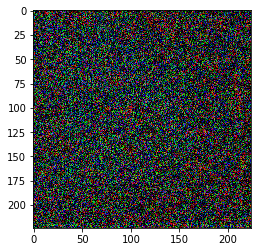

tensor([ 1], device='cuda:0')
Before


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor([[[[-4.3944e-20, -3.2645e-19, -9.5524e-20,  ...,  1.0142e-19,
            2.5930e-21,  2.0571e-19],
          [ 2.9493e-19, -1.6780e-19, -5.7468e-19,  ...,  1.7705e-19,
            5.1962e-20,  2.0524e-21],
          [-1.3019e-20,  3.6079e-19, -2.7516e-19,  ...,  4.4834e-20,
            1.4923e-19,  8.4353e-20],
          ...,
          [ 7.1528e-20, -1.4108e-19,  1.9466e-19,  ...,  1.5785e-19,
            6.6950e-20, -3.3593e-21],
          [-2.2285e-20,  4.1403e-20,  3.5038e-20,  ..., -2.8296e-20,
            1.2769e-20,  2.4156e-20],
          [-3.5093e-20,  9.9429e-20, -4.1182e-20,  ...,  1.0057e-19,
           -5.8726e-20, -1.1049e-19]],

         [[ 7.6465e-20, -2.1828e-19,  4.2997e-19,  ..., -3.7951e-20,
           -1.1189e-21,  1.5350e-20],
          [ 3.5459e-19,  1.0572e-19,  1.2175e-19,  ..., -1.4203e-19,
           -8.4761e-20, -2.5109e-19],
          [ 3.9351e-19,  1.9460e-19, -1.6738e-20,  ..., -2.0551e-19,
           -3.7785e-20,  5.2062e-20],
          ...,
     

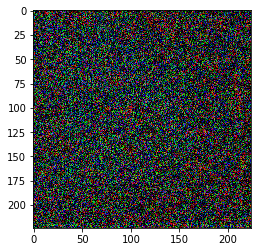

tensor([ 1], device='cuda:0')
Before


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor([[[[-4.3945e-20, -3.2645e-19, -9.5524e-20,  ...,  1.0142e-19,
            2.5930e-21,  2.0571e-19],
          [ 2.9493e-19, -1.6780e-19, -5.7468e-19,  ...,  1.7705e-19,
            5.1962e-20,  2.0525e-21],
          [-1.3020e-20,  3.6079e-19, -2.7516e-19,  ...,  4.4834e-20,
            1.4923e-19,  8.4353e-20],
          ...,
          [ 7.1527e-20, -1.4108e-19,  1.9466e-19,  ...,  1.5785e-19,
            6.6950e-20, -3.3593e-21],
          [-2.2285e-20,  4.1404e-20,  3.5038e-20,  ..., -2.8296e-20,
            1.2769e-20,  2.4156e-20],
          [-3.5093e-20,  9.9429e-20, -4.1182e-20,  ...,  1.0057e-19,
           -5.8726e-20, -1.1049e-19]],

         [[ 7.6465e-20, -2.1828e-19,  4.2997e-19,  ..., -3.7951e-20,
           -1.1188e-21,  1.5350e-20],
          [ 3.5459e-19,  1.0572e-19,  1.2175e-19,  ..., -1.4203e-19,
           -8.4761e-20, -2.5109e-19],
          [ 3.9351e-19,  1.9460e-19, -1.6738e-20,  ..., -2.0551e-19,
           -3.7785e-20,  5.2062e-20],
          ...,
     

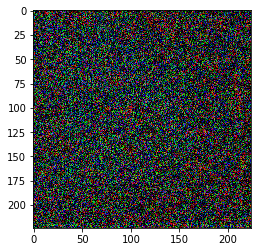

tensor([ 1], device='cuda:0')
Before
tensor([[[[-4.3945e-20, -3.2645e-19, -9.5524e-20,  ...,  1.0142e-19,
            2.5931e-21,  2.0571e-19],
          [ 2.9493e-19, -1.6780e-19, -5.7468e-19,  ...,  1.7705e-19,
            5.1962e-20,  2.0523e-21],
          [-1.3020e-20,  3.6079e-19, -2.7516e-19,  ...,  4.4834e-20,
            1.4923e-19,  8.4353e-20],
          ...,
          [ 7.1528e-20, -1.4108e-19,  1.9466e-19,  ...,  1.5785e-19,
            6.6950e-20, -3.3593e-21],
          [-2.2285e-20,  4.1404e-20,  3.5038e-20,  ..., -2.8296e-20,
            1.2769e-20,  2.4156e-20],
          [-3.5093e-20,  9.9429e-20, -4.1182e-20,  ...,  1.0057e-19,
           -5.8726e-20, -1.1049e-19]],

         [[ 7.6465e-20, -2.1828e-19,  4.2997e-19,  ..., -3.7951e-20,
           -1.1188e-21,  1.5350e-20],
          [ 3.5459e-19,  1.0572e-19,  1.2175e-19,  ..., -1.4203e-19,
           -8.4761e-20, -2.5109e-19],
          [ 3.9351e-19,  1.9460e-19, -1.6738e-20,  ..., -2.0551e-19,
           -3.7785e-2

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


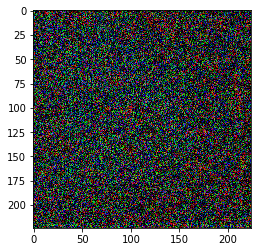

In [8]:
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    img = img.cpu()
    npimg = img.detach().numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()
image_datasets = {x: torchvision.datasets.ImageFolder(os.path.join(data_dir, x),
                                      data_transforms[x]) for x in ['val']}
print(image_datasets)
dataloaders = {x: torch.utils.data.DataLoader(image_datasets[x], batch_size=batch_size,
                                         shuffle=True, num_workers=3) for x in [ 'val']}
print("Hello")
dataset_sizes = {x: len(image_datasets[x]) for x in ['val']}
dataiter = iter(dataloaders['val'])
images, labels= next(dataiter)
# images = torch.zeros([1,3,224,224])
# show images
print(images.shape)
imshow(torchvision.utils.make_grid(images))
print(labels)
criterion = nn.CrossEntropyLoss()
#optimizer_conv = optim.SGD(list(filter(lambda p: p.requires_grad, model_conv.parameters())), lr=0.001, momentum=0.9)
for i in range(40):
    images, labels = Variable(images.cuda(), requires_grad = True), Variable(labels.cuda())
    outputs = model_conv(images)
    if type(outputs) == tuple:
        outputs, _ = outputs
    _, preds = torch.max(outputs.data, 1)
    print(preds)
    #optimizer_conv.zero_grad()
    loss = criterion(outputs, labels)
    #print(loss)
    loss.backward()
    print("Before")
    images.grad = F.normalize(images.grad, p=2, dim=1)
    print(images.grad) 
    images = images - (images.grad)
#     print(images)
    #inputs = inputs.detach().numpy()
    #print("The backward prop is",images.shape)
    imshow(torchvision.utils.make_grid(images))